In [ ]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
import numpy as np


# Data Understanding

In [ ]:
TaxiDataSet = pd.read_csv("dataset.csv")
print(TaxiDataSet);


            ID  travel_fee             departure_time  departure_long  \
0      54:00.0        7.00  2013-07-02 19:54:00+00:00      -74.005360   
1      21:31.0        5.50  2013-09-28 00:21:31+00:00      -74.014165   
2      18:00.0       21.50  2013-06-16 03:18:00+00:00      -73.991075   
3      43:00.0        9.50  2013-07-20 13:43:00+00:00      -74.002662   
4      57:17.0       15.50  2013-11-05 22:57:17+00:00      -73.962397   
...        ...         ...                        ...             ...   
12881  05:00.0       36.50  2013-12-17 16:05:00+00:00      -73.989735   
12882  27:21.0       19.00  2013-05-27 21:27:21+00:00      -73.989028   
12883  30:01.0       57.33  2013-09-03 14:30:01+00:00      -73.989110   
12884  23:31.0        8.00  2013-01-12 10:23:31+00:00      -73.963138   
12885  41:00.0         NaN                        NaN             NaN   

       departure_lat  arrival_long  arrival_lat  occupancy  
0          40.728867    -74.008913    40.710907        1.0  
1

In [ ]:
TaxiDataSet.head()

,ID,travel_fee,departure_time,departure_long,departure_lat,arrival_long,arrival_lat,occupancy
0,54:00.0,7.0,2013-07-02 19:54:00+00:00,-74.005360,40.728867,-74.008913,40.710907,1.0
1,21:31.0,5.5,2013-09-28 00:21:31+00:00,-74.014165,40.708941,-74.016310,40.716734,1.0
2,18:00.0,21.5,2013-06-16 03:18:00+00:00,-73.991075,40.760352,-73.941382,40.713292,1.0
3,43:00.0,9.5,2013-07-20 13:43:00+00:00,-74.002662,40.723630,-73.991722,40.748905,5.0
4,57:17.0,15.5,2013-11-05 22:57:17+00:00,-73.962397,40.712705,-73.996834,40.680403,2.0


In [ ]:
print("Dataset shape:", TaxiDataSet.shape)

print("Date column names:", TaxiDataSet.columns)

print("\nSummary Statistics:")
print(TaxiDataSet.describe())

Dataset shape: (12886, 8)
Date column names: Index(['ID', 'travel_fee', 'departure_time', 'departure_long', 'departure_lat',
       'arrival_long', 'arrival_lat', 'occupancy'],
      dtype='object')

Summary Statistics:
         travel_fee  departure_long  departure_lat  arrival_long  \
count  12885.000000    12885.000000   12885.000000  12885.000000   
mean      12.606825      -72.450537      39.738557    -72.369669   
std       10.643047       11.231020       8.277893     11.481697   
min        0.000000      -84.363473     -74.015385    -84.363473   
25%        6.500000      -73.991996      40.734647    -73.991278   
50%        9.500000      -73.981642      40.752757    -73.979965   
75%       14.000000      -73.966860      40.767144    -73.963162   
max      139.750000       40.789315      40.899978     40.805572   

        arrival_lat     occupancy  
count  12885.000000  12885.000000  
mean      39.700079      1.689639  
std        8.381050      1.357990  
min      -74.014265    

In [ ]:
TaxiDataSet['departure_time']

0        2013-07-02 19:54:00+00:00
1        2013-09-28 00:21:31+00:00
2        2013-06-16 03:18:00+00:00
3        2013-07-20 13:43:00+00:00
4        2013-11-05 22:57:17+00:00
                   ...            
12881    2013-12-17 16:05:00+00:00
12882    2013-05-27 21:27:21+00:00
12883    2013-09-03 14:30:01+00:00
12884    2013-01-12 10:23:31+00:00
12885                          NaN
Name: departure_time, Length: 12886, dtype: object

In [ ]:
print('\nprints information about a DataFrame including \
the index dtype and columns, non-null values and memory usag')
print(TaxiDataSet.info())


prints information about a DataFrame including the index dtype and columns, non-null values and memory usag
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12886 entries, 0 to 12885
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              12886 non-null  object 
 1   travel_fee      12885 non-null  float64
 2   departure_time  12885 non-null  object 
 3   departure_long  12885 non-null  float64
 4   departure_lat   12885 non-null  float64
 5   arrival_long    12885 non-null  float64
 6   arrival_lat     12885 non-null  float64
 7   occupancy       12885 non-null  float64
dtypes: float64(6), object(2)
memory usage: 805.5+ KB
None


We can discovered that the feature arrival_long and arrival_lat has the missing values.

Prossible problem:

*  could not detect the cordinate
*  the taxi driver turn off thier GPS during driving time.

Also the feature occupancy contain 1 feature record is missing which mean there no passengers take this taxi.

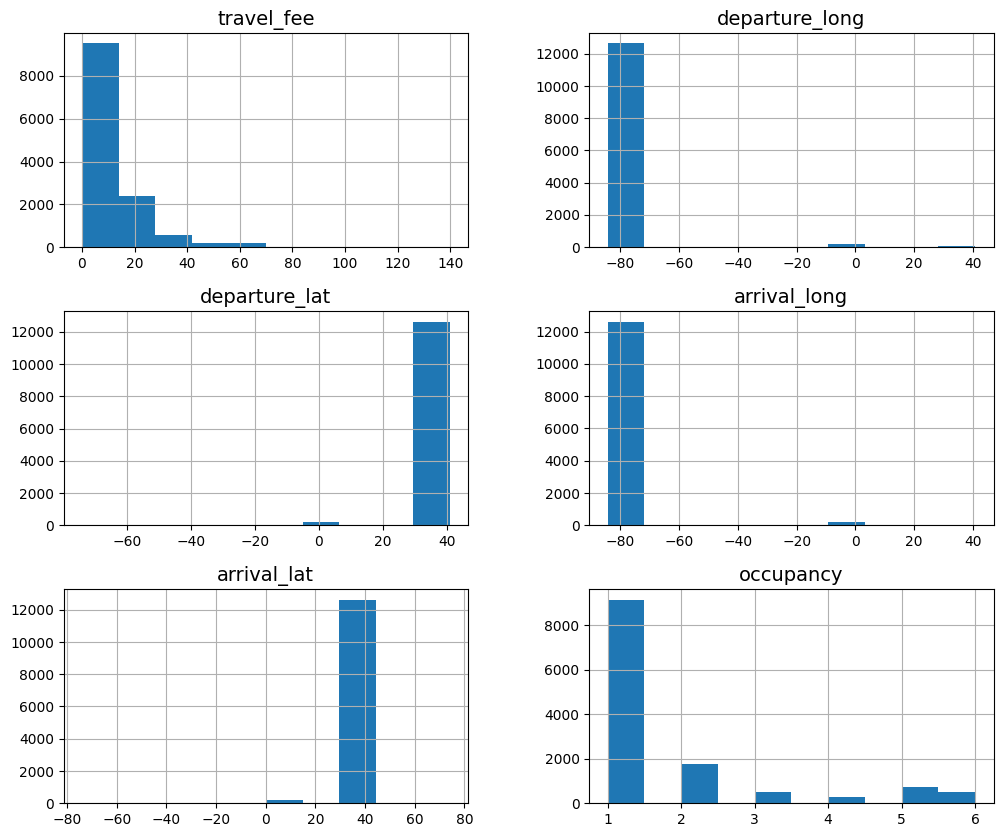

In [ ]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

TaxiDataSet.hist( bins=10,figsize = (12,10))
plt.show()

## Creating train set

We split our dataset into train_set and test_set.

The train_set let us to train the pattern for the Travel_fee feature.

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set =  train_test_split(TaxiDataSet, test_size=0.2, random_state=4)

print("Length of train_set:", len(train_set))
print("Length of test_set:", len(test_set))

Length of train_set: 10308
Length of test_set: 2578


## Discover the Data

This stage to discover the Statistics for each columns in the dataset.


In [ ]:
# Analyzing numerical variables
numerical_columns = ['travel_fee','departure_long','departure_lat','arrival_long','arrival_lat','occupancy']

for column in numerical_columns:
    print("\nStatistics for", column)
    print("Minimum:", train_set[column].min())
    print("Maximum:", train_set[column].max())
    print("Mean:", train_set[column].mean())
    print("Standard deviation:", train_set[column].std())


Statistics for travel_fee
Minimum: 0.0
Maximum: 120.91
Mean: 12.594213232440822
Standard deviation: 10.572520093676982

Statistics for departure_long
Minimum: -74.138387
Maximum: 40.789315
Mean: -72.40077115463718
Standard deviation: 11.436074852870341

Statistics for departure_lat
Minimum: -74.015385
Maximum: 40.899978
Mean: 39.69882697535895
Standard deviation: 8.497348716354672

Statistics for arrival_long
Minimum: -79.373763
Maximum: 40.805572
Mean: -72.3143661548312
Standard deviation: 11.699334816549332

Statistics for arrival_lat
Minimum: -74.011693
Maximum: 74.013003
Mean: 39.65878008013193
Standard deviation: 8.604858947059476

Statistics for occupancy
Minimum: 1.0
Maximum: 6.0
Mean: 1.6989716724873885
Standard deviation: 1.3699894054912534


## Indentify the Correlations

To find the relationship to each columns in the dataset for the target columns 'travel_fee'

In [ ]:
corr_matrix = train_set.corr()
corr_matrix["travel_fee"].sort_values(ascending = False)




<ipython-input-14-2d9aae54114a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_set.corr()


travel_fee        1.000000
occupancy         0.012513
arrival_long      0.009044
departure_lat     0.001411
departure_long   -0.003101
arrival_lat      -0.008341
Name: travel_fee, dtype: float64

# Data Preprocessing

## Clean the train set to remove the null value

In [ ]:
df = train_set

CleanDataSet = df.dropna()
print(CleanDataSet.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10308 entries, 5707 to 1146
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              10308 non-null  object 
 1   travel_fee      10308 non-null  float64
 2   departure_time  10308 non-null  object 
 3   departure_long  10308 non-null  float64
 4   departure_lat   10308 non-null  float64
 5   arrival_long    10308 non-null  float64
 6   arrival_lat     10308 non-null  float64
 7   occupancy       10308 non-null  float64
dtypes: float64(6), object(2)
memory usage: 724.8+ KB
None


## Create new columns 'distance'

Now we try to calculate the distance between the location of departure and the arrival with the formula applied. Because, we could no guest the distance by ourselve by look at the columns 'departure_long', 'departure_lat', 'arrival_long' and 'arrival_lat' with the calculation.

We need to remove all the null-value in the dataset to ensure there is not problem occur during the calculation.

In [ ]:
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in kilometers

    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    distance = R * c

    return distance


CleanDataSet['distance'] = CleanDataSet.apply(
    lambda row: haversine_distance(row['departure_lat'], row['departure_long'], row['arrival_lat'], row['arrival_long']),
    axis=1
)

In [ ]:
CleanDataSet['distance'].max()

8669.820050770872

## Feature Encoding: Handing the DataTime

We turn the column datetime into the numerical attributes to let algorithm recognize the value of the datetime.

In [ ]:

def custom_datetime_parser(dt_str):
    return pd.datetime.strptime(dt_str, '%Y-%m-%dT%H:%M:%SZ')


CleanDataSet['departure_time'] = pd.to_datetime(CleanDataSet['departure_time'], errors='coerce')

CleanDataSet['departure_time'].head()


5707    1970-01-01 00:00:00.000000019
8118    1970-01-01 00:00:00.000000028
1421    1970-01-01 00:00:00.000000015
12314   1970-01-01 00:00:00.000000023
5414    1970-01-01 00:00:00.000000024
Name: departure_time, dtype: datetime64[ns]

Convert the datetime into Days likes Monday, Tuesday, Wednesday, Thursday, Friday, Saturday and Sunday

In [ ]:
CleanDataSet['departure_day']=  CleanDataSet['departure_time'].dt.day

CleanDataSet.head()

,ID,travel_fee,departure_time,departure_long,departure_lat,arrival_long,arrival_lat,occupancy,distance,departure_day
5707,13:00.0,14.0,1970-01-01 00:00:00.000000019,-74.003345,40.748932,-73.987987,40.722647,1.0,3.196395,1
8118,36:00.0,14.0,1970-01-01 00:00:00.000000028,-73.974118,40.791597,-73.985005,40.751627,1.0,4.538033,1
1421,54:00.0,13.5,1970-01-01 00:00:00.000000015,0.000000,0.000000,0.000000,0.000000,2.0,0.000000,1
12314,22:22.0,9.0,1970-01-01 00:00:00.000000023,-74.006074,40.735410,-73.979746,40.749622,1.0,2.723437,1
5414,32:19.0,9.5,1970-01-01 00:00:00.000000024,-73.978775,40.762163,-73.953648,40.787698,2.0,3.541010,1
